# Beta distribution fit for amplitude distribution of TREK-2
similar proceudre like Indra Schroeder 
https://doi.org/10.1080/19336950.2015.1083660

1. Choose transition rates: open level determined by slow rates
2. Generate Gillespie trajectory (contunuous time) and resample it (discrete time) with sampling step << experimental re-sampling step 
3. Add noise with standard deviation according to noise level of closed state
4. Bessel filter with cut-off frequency 5 kHz.
5. Re-sample the signal with 200 kHz 
6. Generate amplitude histogram of simulated data and compare to experimental data

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import math

import time
import random
import networkx as nx
import os

from scipy.stats import norm
from scipy import signal

import sys
import Functions_Gillespie_Trajectory_Resampled as Gillespie
path='../Markov_Models/Bibliotheken/'
res2 = os.listdir(path)
print(res2)
sys.path.append(path)
import Steady_State_Calculation_Spanning_Trees as auto

path = '../0_Matlab_Functions/python/'
sys.path.append(path)
import ClassBetaFit as BetaFit

['Steady_State_Calculation_Spanning_Trees.py', 'Kinesin_Parameters.py', 'Analytic_Quantities.py', 'histogram.eps', 'PDF_Flux_entropy.py', '__pycache__']


In [4]:
cutoff_fs = 5e3
mV = 200

A=np.zeros((4,4))
# state 0: closed state slow
# state 1: closed state fast
# state 2: closed state medium
# state 3: open state

# slow = 0
A[0][3] = 1e2 * 9  # exit rate closed slow
A[3][0] = 1e2 * 3  # dominant for open dwell time 

# medium = 1
A[1][3] = 1e3 * 4.5  # exit rate closed medium
A[3][1] = 1e3 * 5

# fast = 2
A[2][3] = 1e3 * 60   # exit rate closed fast
A[3][2] = 1e3 * 33

print('A = \n', A)
G=auto.Matrix2Graph(A)
p=auto.steady_state(G)
print('steady state p = ',p)

# Read experimental data
mV = -200
folder2 = '../SUBSTATES_differentFreq/fixedEdges/'
fname_N = folder2 + str(int(cutoff_fs/1e3)) + 'kHz_' + str(mV) + 'mV_N.txt'
fname_edges = folder2 +  str(int(cutoff_fs/1e3)) + 'kHz_' + str(mV) + 'mV_edges.txt'
exp_N = np.loadtxt(fname_N);
exp_edges = np.loadtxt(fname_edges)

#plt.plot(exp_edges, exp_N)
print('Number of bins', len(exp_edges))
print('min: ', min(exp_edges), '; max: ', max(exp_edges))

# write out matrix
#np.savetxt(str(int(cutoff_fs/1e3)) + 'kHz_'+str(mV)+'_mV_TransitionMatrix_5states.txt', A)

A = 
 [[    0.     0.     0.   900.]
 [    0.     0.     0.  4500.]
 [    0.     0.     0. 60000.]
 [  300.  5000. 33000.     0.]]
steady state p =  [0.11131725 0.37105751 0.18367347 0.33395176]
Number of bins 272
min:  -79.835 ; max:  9.59500000000001


downsampling step =  25
../SUBSTATES_differentFreq/fixedEdges/
5000.0
number of Gillespie steps 26309
number of sample steps  4980810
number of transitions not seen by sample step 233
(analytical) steady state p =  [0.11131725 0.37105751 0.18367347 0.33395176]
(simulated) Gillespie prob =  [0.09005775 0.38005788 0.18773824 0.34093615]
number of sample states N =  5000000
sample states min =  -1.0
sample states max =  3.0
indistinguishable states min =  -58.0
indistinguishable states max =  -1.625
number of -1 states (error) 19190 in percent 0.003838
p_sample =  [0.0900482, 0.3798898, 0.186608, 0.339616, 0.0]
unique values in sample_indistinguishable [-58.     -1.625]
std. dev. of noise  19.39800296282405



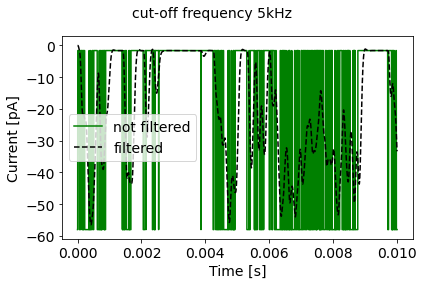

length of sampled states =  5000000
std. dev. of additive noise before filtering  19.406242403908667
std. dev. of noise after filtering 0.7254388845314863
std. dev. of noise after filtering and downsampling 0.7254379562528931



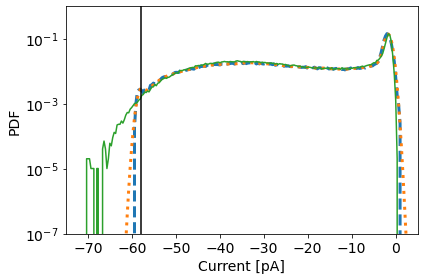

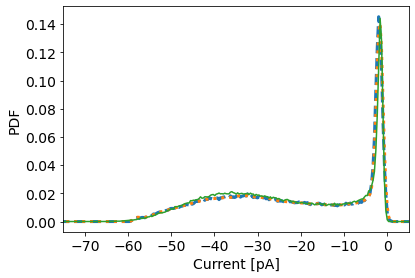

In [6]:
folder2 = '../SUBSTATES_differentFreq/fixedEdges/'
name = '4closedStates/'
test = BetaFit.ModelBetaFit(expData=[-200, folder2])
print(test.cutoff_fs)
test.FIT_param(A, states=[[0,1,2], 3], currentLevels=[-1.625, -58], baselineNoise=[19.4, 0.72])
test.GenerateGillespieTrajectory()
test.Filter(plot=1)#name=name
test.NoiseLevelBeforeFilter()
test.GenerateHistogram()
test.PlotAmplitudeDistribution(exp=1)# name=name
test.PlotAmplitudeDistribution(exp=1, log=0)
#test.WriteOutTrajectories(outFolder=name)